In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("PhishingData.csv")
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,-1,0,0,0,0,0,-1,1,0,...,0,0,-1,0,1,0,0,0,0,1
2452,0,-1,0,1,0,0,0,0,1,0,...,0,0,0,1,-1,0,0,1,0,1
2453,0,-1,0,0,0,0,0,1,0,0,...,0,0,-1,0,1,0,0,0,0,0
2454,0,-1,0,0,0,0,-1,-1,1,0,...,0,0,1,0,-1,-1,0,0,0,1


In [3]:
#Checking if there are any null values to be dealt with
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [4]:
#checking for outliers
Q75 = np.percentile(data["Result"], 75)
Q25 = np.percentile(data["Result"], 25)
IQR = Q75 - Q25
upper_b = Q75 + 1.5*IQR
lower_b = Q25 - 1.5*IQR
upper_ol = np.where(data["Result"] >= upper_b)
lower_ol = np.where(data["Result"] <= lower_b)

In [5]:
#No outliers detected
print(upper_ol,"\n", lower_ol)

(array([], dtype=int64),) 
 (array([], dtype=int64),)


In [6]:
#checking the relations between Result and the different features
data.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,0.103582,0.946315,-0.085825,0.920203,0.108087,0.018615,0.043557,-0.098534,0.030326,...,0.049965,0.028537,0.050481,0.228888,0.106839,-0.016420,-0.047548,0.244556,0.215134,-0.061623
URL_Length,0.103582,1.000000,0.119039,0.069272,0.101536,0.068191,-0.012365,0.041580,-0.326758,0.045295,...,0.053432,0.012847,0.014283,0.051523,0.024704,0.000726,-0.026701,-0.007836,0.084554,-0.055605
Shortining_Service,0.946315,0.119039,1.000000,-0.068114,0.876519,0.111831,0.027941,0.052711,-0.089549,0.014858,...,0.045988,0.018059,0.056724,0.241016,0.095182,-0.027334,-0.043555,0.213561,0.219520,-0.061175
having_At_Symbol,-0.085825,0.069272,-0.068114,1.000000,-0.090966,0.026929,0.001966,-0.004449,-0.001145,-0.116249,...,-0.118706,-0.076476,0.035179,-0.107532,-0.066232,0.038937,-0.029553,-0.088749,-0.102878,0.008336
double_slash_redirecting,0.920203,0.101536,0.876519,-0.090966,1.000000,0.106398,0.020216,0.031330,-0.092049,0.048790,...,0.066721,0.015559,0.037953,0.233517,0.112327,-0.015349,-0.046161,0.202975,0.207816,-0.042536
Prefix_Suffix,0.108087,0.068191,0.111831,0.026929,0.106398,1.000000,0.115494,0.372453,-0.139030,-0.020312,...,-0.010835,0.011677,0.178187,-0.070127,0.241684,0.219008,-0.164327,0.069498,0.012800,-0.537020
having_Sub_Domain,0.018615,-0.012365,0.027941,0.001966,0.020216,0.115494,1.000000,0.259734,-0.049267,-0.017455,...,0.007021,-0.031687,0.338584,-0.061389,0.080901,0.097460,-0.051731,-0.022250,-0.018942,-0.266514
SSLfinal_State,0.043557,0.041580,0.052711,-0.004449,0.031330,0.372453,0.259734,1.000000,-0.219062,0.005514,...,0.003094,-0.002762,0.365856,-0.137868,0.408251,0.277823,-0.137412,-0.012810,-0.023872,-0.712876
Domain_registeration_length,-0.098534,-0.326758,-0.089549,-0.001145,-0.092049,-0.139030,-0.049267,-0.219062,1.000000,-0.065988,...,-0.070668,-0.021585,-0.126950,0.033052,-0.201828,-0.039803,0.071476,0.105951,-0.026921,0.260157
Favicon,0.030326,0.045295,0.014858,-0.116249,0.048790,-0.020312,-0.017455,0.005514,-0.065988,1.000000,...,0.942697,0.643493,0.008309,0.164356,0.079784,-0.032929,-0.024208,0.130500,0.656712,0.005067


In [7]:
#Removing the features which do not have much impact on Result
data.drop(["having_IP_Address", "URL_Length", "Shortining_Service", "having_At_Symbol","double_slash_redirecting","Favicon", "port", "HTTPS_token"], axis = 1, inplace = True)

In [8]:
data.drop(["SFH", "Submitting_to_email", "Abnormal_URL", "Redirect", "on_mouseover", "RightClick", "popUpWidnow", "Iframe", "Links_pointing_to_page", "Statistical_report"], axis = 1, inplace = True)

In [9]:
data

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Result
0,-1,-1,-1,0,1,-1,1,-1,1,-1,-1,0,1
1,-1,0,1,0,1,0,-1,-1,1,0,-1,0,1
2,-1,-1,-1,0,1,0,-1,0,1,1,-1,0,1
3,-1,-1,-1,1,-1,0,0,-1,1,1,-1,0,1
4,-1,1,1,0,1,0,0,-1,1,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,0,0,-1,1,-1,-1,-1,-1,0,1,0,0,1
2452,0,0,0,1,-1,-1,0,0,1,-1,0,0,1
2453,0,0,1,0,1,0,1,-1,0,1,0,0,0
2454,0,-1,-1,1,1,-1,-1,1,0,-1,-1,0,1


<AxesSubplot:>

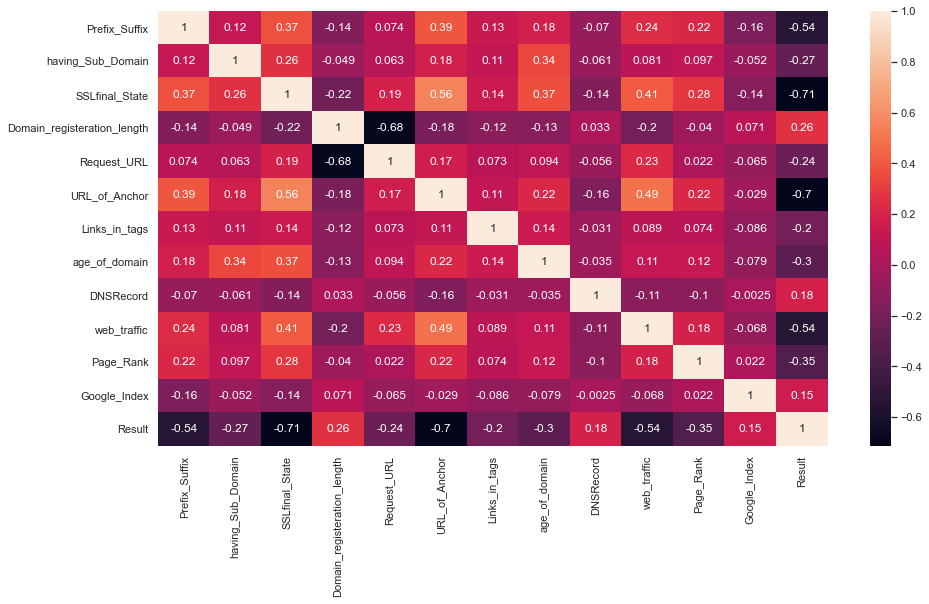

In [10]:
# Visual Co-relations of different features
sb.set(rc = {"figure.figsize":(15,8)})
sb.heatmap(data[["Prefix_Suffix", "having_Sub_Domain", "SSLfinal_State", "Domain_registeration_length", "Request_URL", "URL_of_Anchor", "Links_in_tags", "age_of_domain", "DNSRecord", "web_traffic", "Page_Rank", "Google_Index", "Result"]].corr(), annot = True)

In [11]:
#Checking the unique values of all columns
for i in data:
    print(data[i].value_counts())

 0    1174
-1     954
 1     328
Name: Prefix_Suffix, dtype: int64
-1    1060
 0     792
 1     604
Name: having_Sub_Domain, dtype: int64
 1    1416
-1     788
 0     252
Name: SSLfinal_State, dtype: int64
 0    890
 1    806
-1    760
Name: Domain_registeration_length, dtype: int64
 1    1468
-1     988
Name: Request_URL, dtype: int64
 0    1202
-1     718
 1     536
Name: URL_of_Anchor, dtype: int64
 0    1056
-1     804
 1     596
Name: Links_in_tags, dtype: int64
-1    1088
 1    1080
 0     288
Name: age_of_domain, dtype: int64
1    1318
0    1138
Name: DNSRecord, dtype: int64
 1    1342
-1     594
 0     520
Name: web_traffic, dtype: int64
-1    1728
 1     400
 0     328
Name: Page_Rank, dtype: int64
0    2113
1     343
Name: Google_Index, dtype: int64
0    1362
1    1094
Name: Result, dtype: int64


In [12]:
#Storing values required for classification in x while the target value in y
x = data.iloc[:,:12].values
y = data.iloc[:,12:].values

In [13]:
x

array([[-1, -1, -1, ..., -1, -1,  0],
       [-1,  0,  1, ...,  0, -1,  0],
       [-1, -1, -1, ...,  1, -1,  0],
       ...,
       [ 0,  0,  1, ...,  1,  0,  0],
       [ 0, -1, -1, ..., -1, -1,  0],
       [ 0,  0,  1, ...,  1,  1,  0]], dtype=int64)

In [14]:
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [15]:
#Splitting the data set into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [16]:
#Scaling the data in one standard range for better prediction
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

In [17]:
#Using logistic regression to build the classsification model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print(y_pred)

[1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1
 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1
 0 0 0 0 0 1 0 1 0 1 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [18]:
#Checking the accuracy of the model built
from sklearn.metrics import accuracy_score
print("Testing accuracy:", accuracy_score(y_test, y_pred))

Testing accuracy: 0.9369918699186992


In [19]:
#checking the training accuracy o the model
print("Training accuracy:", log_reg.score(x_train, y_train))

Training accuracy: 0.9455193482688391


In [20]:
#Plotting a bar graph for the predicted result
phishingResult = {i:list(y_pred).count(i) for i in set(y_pred)}
phishingResult

{0: 272, 1: 220}

In [21]:
phishingResult["Not a Phishing Website"] = phishingResult.pop(0)
phishingResult["Phishing Website"] = phishingResult.pop(1)

<BarContainer object of 2 artists>

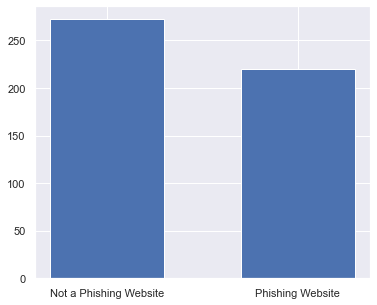

In [22]:
label = phishingResult.keys()
values = phishingResult.values()
plt.figure(figsize = (6,5))
plt.bar(label, values, width = 0.6)